**Michael Vizelman**

## Predictive Analysis using scikit-learn ## 
___

**Project Objectives**
- Use tools learned in the course to prepare data for predictive analysis.
- Construct a predictive model using tools available within the scikit-learn library.
- Answer the question: “Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

### Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis 

- Import the dataset and choose which variables to keep for the analysis.
- Include the column that indicates edible or poisonous, the column that includes odor, and at least two other columns of your choosing.

In [1]:
#load pandas and numpy libraries
import pandas as pd 
import numpy as np

In [2]:
#load the entire dataset from GitHub
mr_df = pd.read_csv("https://raw.githubusercontent.com/vizelman/Projects/main/Data_Files/Mushroom_dataset.data?token=ANAIKVPY2LU6J74QIO3G273AB4L4A", header = None)

In [3]:
#check the dataset uploaded as expected
mr_df.head() 

#we could see the first variable isn't what we expected from the data dictionary,
#it is the variable indicating whether a mushroom is: 
#e-edible or p-poisonous

#show the shape of the data frame
print(mr_df.shape)

(8124, 23)


From studying the data dictionary we know that variable 11 - 'stalk-root' has missing values as '?'.   
We want to check if they are present and change them to NaN using numpy.nan.

In [4]:
#check the type of values in 'stalk-root' column
mr_df[11].drop_duplicates()

0       e
1       c
29      b
33      r
3984    ?
Name: 11, dtype: object

In [5]:
#replace the '?' with NaN before doing any computations
mr_df[11]=mr_df[11].replace('?',np.nan)

In [6]:
#make sure the data changed as we expected and we have no '?'
mr_df[11].drop_duplicates()

0         e
1         c
29        b
33        r
3984    NaN
Name: 11, dtype: object

Now the '?' are missing values also for Python.

In order to choose which columns we want to keep from the dataset, we can use the Chi-Square test.

*The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.A chi-squared test can be used to attempt rejection of the null hypothesis that the data are independent.Also considered a chi-squared test is a test in which this is asymptotically true, meaning that the sampling distribution (if the null hypothesis is true) can be made to approximate a chi-squared distribution as closely as desired by making the sample size large enough.* (Wikipedia)

In our case, we have enough observations (8124) to make the assumption of a large enough sample size.

The first step is to create the cross tab for each variable compared with the variable which indicates if the mushroom is an edible/poisonous mushroom. The process of the Chi-Square test has to verify that the distribution of our variable is independent from another. If that was true the observation would be equally distributed between each category for both of the variables.

We illustrate the process below, for the 'cap-shape' variable.

In [7]:
#create a bivariate table in a data frame
crosstab = pd.crosstab(mr_df[0], mr_df[1])
#show table
crosstab

1,b,c,f,k,s,x
0,,,,,,
e,404,0,1596,228,32,1948
p,48,4,1556,600,0,1708


From the bivariate table above, we can see that the 'cap-shape' variable isn't that independent of the edible/poisonous variable. Only cap-shapes 'f' and 'x' seem to be independent.  

The second step is to apply the Chi-Square test using the function chi2_contingency.  
To do that we have to import scipy.stats.

In [8]:
#load scipy.stats
from scipy import stats

#perform Chi-Square test
stats.chi2_contingency(crosstab)

(489.9199536189558,
 1.1964565685935438e-103,
 5,
 array([[ 234.12309207,    2.07188577, 1632.6459872 ,  428.88035451,
           16.57508616, 1893.70359429],
        [ 217.87690793,    1.92811423, 1519.3540128 ,  399.11964549,
           15.42491384, 1762.29640571]]))

The function returns a four part output: 
1. Chi-Square value - The test statistic
2. The p-value of the test
3. Degrees of freedom
4. The expected frequencies, based on the marginal sums of the table (an array of how the observations should have been distributed to be independent of each other).

Now instead of testing each variable in the data set seperatly, we use a for loop to extract only the first two results in the output returned by the chi2_contingency() function, and the corresponding index of the variable in our data frame. We sort the results in descendind order of Chi-Square value.  

In [9]:
# create an empty list to hold the results of the test
chi_sq=[]

#for each  column in the data frame,
#perfom Chi-Square test and append the Chi-Square value and p-value to 'chi_sq' list.
for i in range(1,23):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(mr_df[0], mr_df[i]))[0:2],i])

#sort by chi_sq value
chi_sq.sort(reverse=True)

#show the results for the variables in our data set
chi_sq

[[(7659.726740165339, 0.0), 5],
 [(4602.0331700846045, 0.0), 20],
 [(3765.714086241481, 0.0), 9],
 [(2956.619278057532, 0.0), 19],
 [(2808.2862874186076, 0.0), 12],
 [(2684.4740763290565, 0.0), 13],
 [(2366.8342569059605, 0.0), 8],
 [(2237.898496448818, 0.0), 14],
 [(2152.3908905982817, 0.0), 15],
 [(2041.4156474619554, 0.0), 4],
 [(1929.7408909028088, 0.0), 21],
 [(1573.7772608252621, 0.0), 22],
 [(984.1433330144739, 5.0229776137324786e-216), 7],
 [(638.2637626946303, 5.103920794627432e-138), 11],
 [(489.9199536189558, 1.1964565685935438e-103), 1],
 [(387.5977689772298, 6.055814598336576e-78), 3],
 [(374.7368308267115, 4.23575764172306e-82), 18],
 [(315.0428312080377, 5.518427038649143e-68), 2],
 [(191.22370152470324, 3.32097274916963e-41), 17],
 [(133.9861812865668, 5.501707411861009e-31), 6],
 [(84.14203826548719, 4.604746212155192e-20), 10],
 [(0.0, 1.0), 16]]

From the output above we can see that the variable with the highest Chi-Square value has index number 5 - it is the 'Odor', the variable we are required to include. Now the reason for it being required is clearer. A high Chi-square value and very low p value indicate that the variables are not independent of each other.

In conclusion ,according to the results of the test, we are going to include the following variables:   
- index number 20 - 'spore-print-color' 
- index number 9 - 'gill-color'
- index number 19 - 'ring-type'

### Phase I: EDA
Perform exploratory data analysis: 
- show the distribution of data for each of the columns you selected.
- show plots for edible/poisonous vs. odor as well as the other columns that you selected. 
- Include text describing your EDA findings.

Now we are ready to subset our dataset and perform exploratory data analysis.

In [10]:
#subset the data frame with only the columns we decided to keep 
mr_sub=mr_df[[0,5,20,9,19]].copy()

In [11]:
#rename the columns of the subset with meaningful names
mr_sub.rename(columns={0:'edible',5:'odor',20:'spore_print_color',9:'gill_color',19:'ring_type'},inplace=True)

#rename all the data values of the subset with meaningful names
#replace 'edible' column values using a dict
mr_sub.edible.replace({'e': 'edible',
                       'p': 'poisonous'}, inplace = True)

#replace 'odor' column values using a dict
mr_sub.odor.replace({'a': 'almond',
                     'l': 'anise',
                     'c': 'creosote',
                     'y': 'fishy',
                     'f': 'foul',
                     'm': 'musty',
                     'n': 'none',
                     'p': 'pungent',
                     's': 'spicy'}, inplace = True)

#replace 'spore_print_color' column values using a dict
mr_sub.spore_print_color.replace({'k': 'black',
                                  'n': 'brown',
                                  'b': 'buff',
                                  'h': 'chocolate',
                                  'r': 'green', 
                                  'o': 'orange',
                                  'u': 'purple', 
                                  'w': 'white',
                                  'y': 'yellow'}, inplace = True)

#replace 'gill_color' column values using a dict
mr_sub.gill_color.replace({'k': 'black',
                           'n': 'brown',
                           'b': 'buff',
                           'h': 'chocolate',
                           'g': 'gray',
                           'r': 'green',
                           'o': 'orange', 
                           'p': 'pink', 
                           'u': 'purple', 
                           'e': 'red', 
                           'w': 'white',
                           'y': 'yellow'}, inplace = True)

#replace 'ring_type' column values using a dict
mr_sub.ring_type.replace({'c': 'cobwebby',
                          'e': 'evanescent',
                          'f': 'flaring',
                          'l': 'large',
                          'n': 'none',
                          'p': 'pendant',
                          's': 'sheathing',
                          'z': 'zone'}, inplace = True)
                         
#check the results are as expected
mr_sub.head()

,edible,odor,spore_print_color,gill_color,ring_type
0,poisonous,pungent,black,black,pendant
1,edible,almond,brown,black,pendant
2,edible,anise,brown,brown,pendant
3,poisonous,pungent,black,brown,pendant
4,edible,none,brown,black,evanescent


Now we'll get descriptive statistics of our variables and show the distribution of data for the edible variable and each of the variables we chose to keep.

In [52]:
#get descriptive statistics for our subset of variables to keep
mr_sub.describe()

,edible,odor,spore_print_color,gill_color,ring_type
count,8124,8124,8124,8124,8124
unique,2,9,9,12,5
top,edible,none,white,buff,pendant
freq,4208,3528,2388,1728,3968


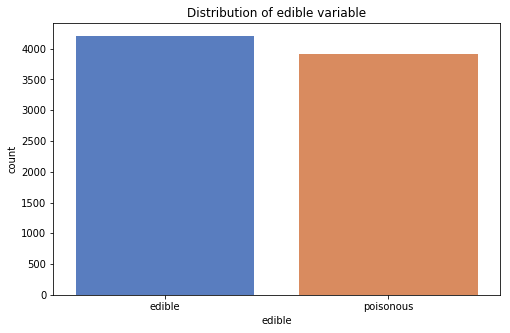

In [54]:
#load seaborn 
import seaborn as sns
#load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

#set colors for our seaborn plots
sns.set_palette("muted")

#define figure size 
plt.figure(figsize=(8,5))

#plot the distribution of data for 'edible' variable
sns.countplot(mr_sub['edible'], order = mr_sub['edible'].value_counts().index);

#give the plot a title using Matplotlib
plt.title('Distribution of edible variable');

We can see that both classes in the 'edible' variable have a similar frequency, considering the high number of observations.   
After we plot the distribution of data for our other variables we can proceed with confronting 'edible' with the other variables.

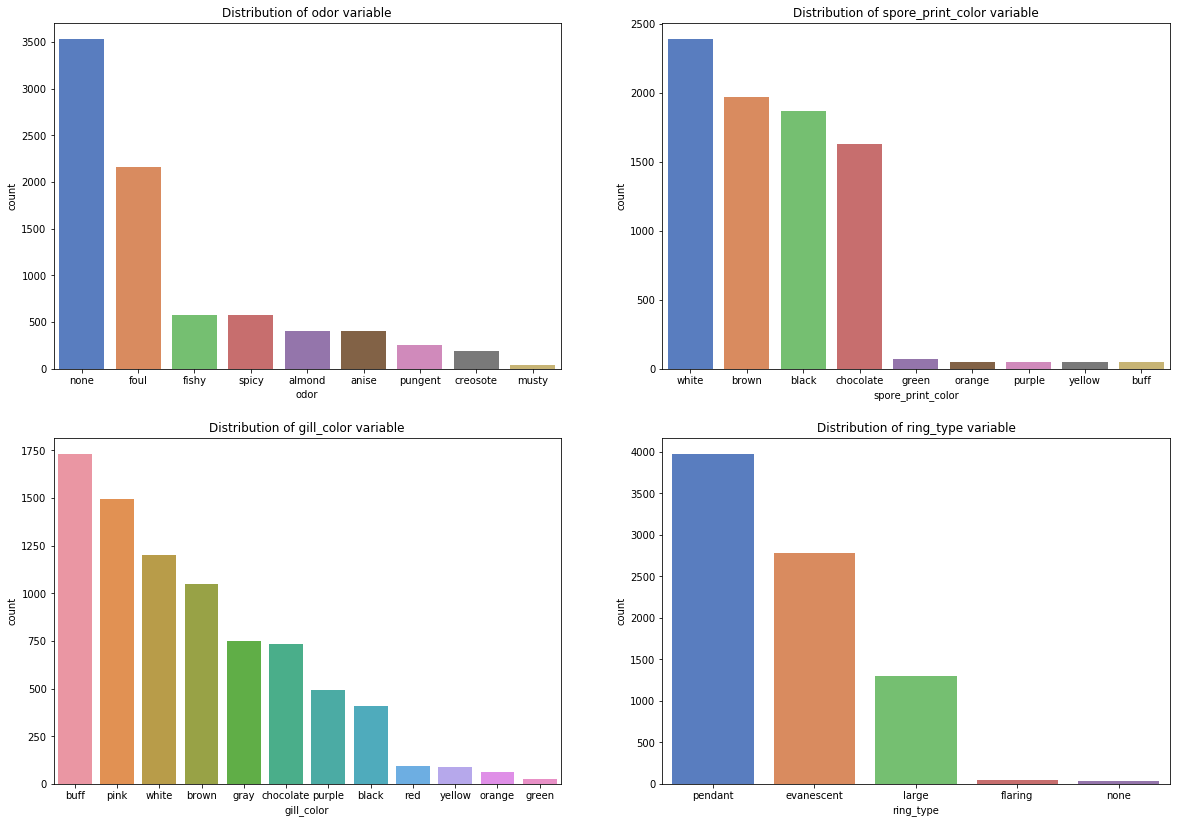

In [48]:
fig = plt.figure(figsize=(20, 14))
#plot each variables distribution of observations

#plot the distribution of data for 'odor' variable
plt.subplot(2, 2, 1)
sns.countplot(mr_sub['odor'], order = mr_sub['odor'].value_counts().index);
plt.title('Distribution of odor variable');

#plot the distribution of data for 'spore_print_color' variable
plt.subplot(2, 2, 2)
sns.countplot(mr_sub['spore_print_color'], order = mr_sub['spore_print_color'].value_counts().index);
plt.title('Distribution of spore_print_color variable');

#plot the distribution of data for 'gill_color' variable
plt.subplot(2, 2, 3)
sns.countplot(mr_sub['gill_color'], order = mr_sub['gill_color'].value_counts().index);
plt.title('Distribution of gill_color variable');

#plot the distribution of data for 'ring_type' variable
plt.subplot(2, 2, 4)
sns.countplot(mr_sub['ring_type'], order = mr_sub['ring_type'].value_counts().index);
plt.title('Distribution of ring_type variable');

plt.show()

We can see from the 'odor' plot that odorless (none) and foul mushrooms are most common in our dataset.   
From the 'spore_print_color' plot we see most mushrooms in our dataset are either white, brown, black or chocolate.   
From the 'gill_color' plot, we see that there is a broader distribution of color.    
From the 'ring_type' plot we see that around half of the observations in the dataset are pendant type, evanescent type is second most common.   

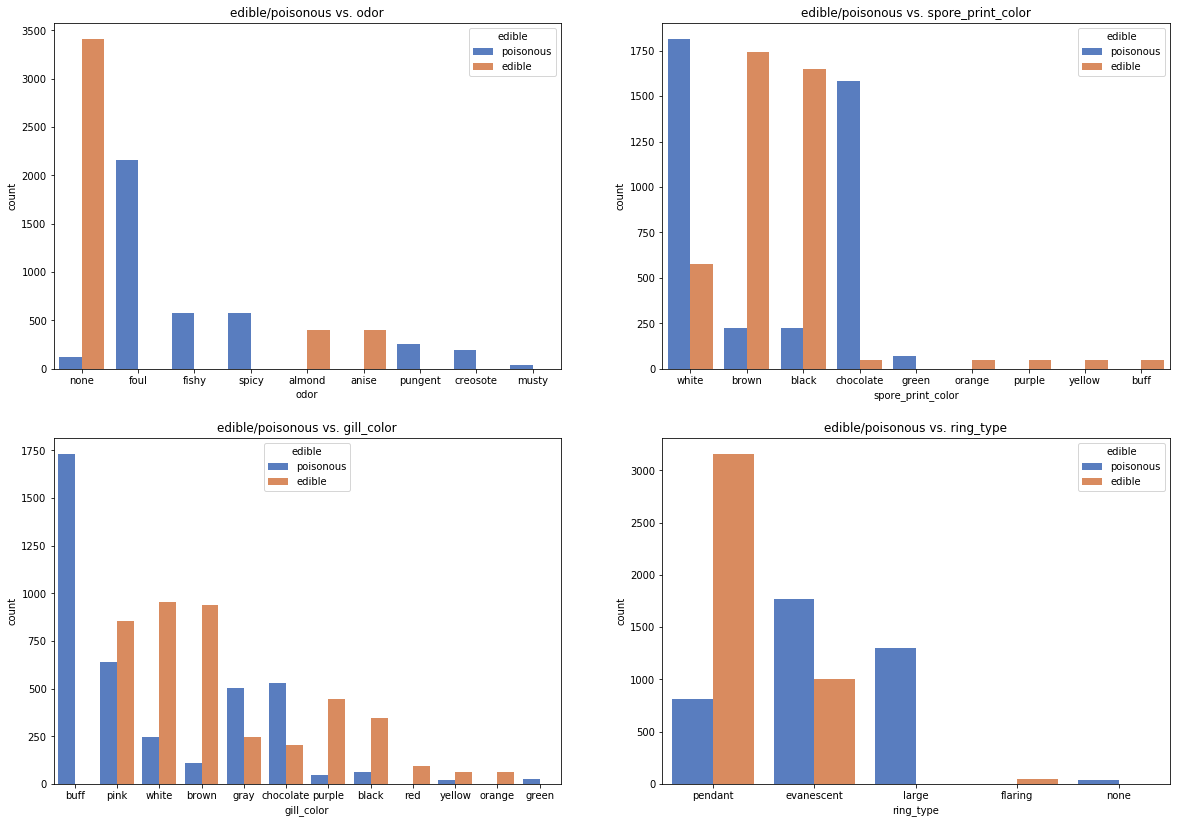

In [59]:
fig = plt.figure(figsize=(20,14))
#plot each variable we chose to keep vs. edible variable

#plot edible vs. odor
plt.subplot(2, 2, 1)
sns.countplot(x="odor", hue="edible", data=mr_sub,
             order = mr_sub['odor'].value_counts().index)
plt.title('edible/poisonous vs. odor');

#pllt edible vs. spore_print_color
plt.subplot(2, 2, 2)
sns.countplot(x="spore_print_color", hue="edible", data=mr_sub,
             order = mr_sub['spore_print_color'].value_counts().index)
plt.title('edible/poisonous vs. spore_print_color');

#plot edible vs. gill_color
plt.subplot(2, 2, 3)
sns.countplot(x="gill_color", hue="edible", data=mr_sub,
             order = mr_sub['gill_color'].value_counts().index)
plt.title('edible/poisonous vs. gill_color');

#edible vs. Cap_color
plt.subplot(2, 2, 4)
sns.countplot(x="ring_type", hue="edible", data=mr_sub, 
              order = mr_sub['ring_type'].value_counts().index)
plt.title('edible/poisonous vs. ring_type');

plt.show()

Looking at the above plots it's possible to see that all of the 4 variables would be very helpful to predict if a mushroom is poisonous or edible. For example it's seams very probable that a mushroom with foul odor, chocolate spore print color, buff gill color and large ring type could be poisonous. 

Now the variables have to be transformed into dummies. This will help us in the next step.

In [19]:
mr_dum=pd.get_dummies(mr_sub,drop_first =True)
mr_dum.head()

,edible_poisonous,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,spore_print_color_brown,...,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Phase II

Use scikit-learn to determine which of the predictor columns that you selected most accurately predicts whether or not a mushroom is poisonous.

From the Chi square test we performed earlier, we know that the variables who are most predective of whether a mushroom is edible or not are in the following order:
1. odor
2. spore-print-color
3. gill-color
4. ring-type

Now we would like to build a model with all of them. Considering the amount of observations that we have in our dataset, and the number of variables, overfitting doesn't seem to be an issue in this model.

In [20]:
#load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression

First we have to create rabdom test and a training datasets.

In [21]:
#import train_test_split to split the dataframe in test and train
from sklearn.model_selection import train_test_split

#create the 2 dataframe and we chose to have a test sample that is the 20% of the total dataset.
train, test = train_test_split(mr_dum, test_size=0.2)

In [22]:
#just to check if the train sample is as expected
print(len(train))
train.head()

6499


,edible_poisonous,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,spore_print_color_brown,...,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant
1248,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2136,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7982,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4255,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
320,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#just to check if the test sample is as expected
print(len(test))
test.head()

1625


,edible_poisonous,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,spore_print_color_brown,...,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant
2830,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3270,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2261,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
735,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5415,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Now let's check if the proportion of edible and poisonous is the same as in the beginning, applying the describe() on both the samples.

In [24]:
train['edible_poisonous'].describe()

count    6499.000000
mean        0.483921
std         0.499780
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: edible_poisonous, dtype: float64

In [25]:
test['edible_poisonous'].describe()

count    1625.000000
mean        0.474462
std         0.499501
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: edible_poisonous, dtype: float64

Yes the proportion has not changed between test and train datsets, and also considering the entire dataset.

Now we have to evaluate the accuracy of the train model .We can already see it in the describe but let's confirm.

In [26]:
# what percentage of the training set poisonous?
train.edible_poisonous.values.sum() / train.shape[0]

0.4839206031697184

In the train dataset 48% of the mushrooms are poisonous so we should achieve a training model accuracy of 48% by simply predicting "Poisonous" for each mushroom.  


Now we want to check for null values in our two samples.

In [27]:
# check the training data for null values
train.isnull().sum()

edible_poisonous               0
odor_anise                     0
odor_creosote                  0
odor_fishy                     0
odor_foul                      0
odor_musty                     0
odor_none                      0
odor_pungent                   0
odor_spicy                     0
spore_print_color_brown        0
spore_print_color_buff         0
spore_print_color_chocolate    0
spore_print_color_green        0
spore_print_color_orange       0
spore_print_color_purple       0
spore_print_color_white        0
spore_print_color_yellow       0
gill_color_brown               0
gill_color_buff                0
gill_color_chocolate           0
gill_color_gray                0
gill_color_green               0
gill_color_orange              0
gill_color_pink                0
gill_color_purple              0
gill_color_red                 0
gill_color_white               0
gill_color_yellow              0
ring_type_flaring              0
ring_type_large                0
ring_type_

In [28]:
# check the test data for null values
test.isnull().sum()

edible_poisonous               0
odor_anise                     0
odor_creosote                  0
odor_fishy                     0
odor_foul                      0
odor_musty                     0
odor_none                      0
odor_pungent                   0
odor_spicy                     0
spore_print_color_brown        0
spore_print_color_buff         0
spore_print_color_chocolate    0
spore_print_color_green        0
spore_print_color_orange       0
spore_print_color_purple       0
spore_print_color_white        0
spore_print_color_yellow       0
gill_color_brown               0
gill_color_buff                0
gill_color_chocolate           0
gill_color_gray                0
gill_color_green               0
gill_color_orange              0
gill_color_pink                0
gill_color_purple              0
gill_color_red                 0
gill_color_white               0
gill_color_yellow              0
ring_type_flaring              0
ring_type_large                0
ring_type_

In both dataset we don't have missing values.

We have to separate the explanatory variables from the response indicator.

In [29]:
# create a subset of the training data using ONLY the selected explanatory variables
X_train = train.loc[:, train.columns != 'edible_poisonous'].values

# create a subset of the testing data using ONLY the selected explanatory variables
X_test = test.loc[:, train.columns != 'edible_poisonous'].values

#create the response for the test dataframe.
y_test=test['edible_poisonous'].values
# isolate the response indicator for the training data
y_train = train['edible_poisonous'].values

# sanity check on training data
X_train[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [30]:
# sanity check on response indicator
y_train[:5]

array([0, 0, 1, 1, 0], dtype=uint8)

Since everything seems correct we can proceed with the logistic regression. 

In [41]:
#we're using the LogisticRegression() method for this model
model = LogisticRegression()

#fit the model: X_train contains our explanatory variables while 
#y_train contains the response variable
model.fit(X_train, y_train)

/Users/michael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
#calculate the accuracy of the model relative to the training data set
model.score(X_train, y_train)

0.9941529466071704

It seems that our model has a really high level of prediction of the edible or poisonous type of mushroom.  
Now let's see which attribute has more impact on the variable.

In [33]:
coeff=(pd.DataFrame(zip(train.loc[:, train.columns != 'edible_poisonous'].columns, np.transpose(model.coef_)))).sort_values(by=1)
coeff.rename(columns={0:'variable',1:'coefficient'},inplace=True)

In [34]:
coeff['exponential']=pow(2.71828,coeff['coefficient'])
coeff

,variable,coefficient,exponential
5,odor_none,[-3.3420319761597947],[0.03536510327872752]
0,odor_anise,[-2.0948804044523386],[0.123085136629803]
24,gill_color_red,[-1.9053305643665568],[0.14877364596180856]
30,ring_type_pendant,[-1.504542206407934],[0.22211917998671654]
27,ring_type_flaring,[-1.4894070948182772],[0.22550654570038114]
13,spore_print_color_purple,[-0.7410701753350006],[0.4766038306713861]
8,spore_print_color_brown,[-0.7063632145182959],[0.4934356916293932]
16,gill_color_brown,[-0.504142296859126],[0.60402363093599]
22,gill_color_pink,[-0.35676885534968183],[0.6999344330703355]
12,spore_print_color_orange,[-0.21063024699620336],[0.8100736534088246]


**Which attribute aside from the poisonous/edible indicator is the best predictors of whether a particular mushroom is poisonous or edible?**  

As we can see from the coefficient, odor has the highest impact on the prediction of both edible and poisonous.  
Moreover, the highest level is due to the green spore print. The exponential of the coefficient could be read as: holding all the other characteristics at a fixed value, if the mushroom has the spore print green the odds for it to be poisonous are higher than of the one that has a different spore color.


Now we want to generate predictions for the sample that we set as test.

In [35]:
#we use the predict_proba to extract the probablity to be edible or poisonous from the test sample.
#we save them and round them to have more clear numbers.
probs = np.around(model.predict_proba(X_test),decimals=3)
probs

array([[0.996, 0.004],
       [0.059, 0.941],
       [0.996, 0.004],
       ...,
       [0.973, 0.027],
       [0.97 , 0.03 ],
       [0.997, 0.003]])

In [60]:
#generate predictions for the test data using our new model
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 1, 0, 0, 0], dtype=uint8)

In [37]:
test.head()

,edible_poisonous,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,spore_print_color_brown,...,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,gill_color_yellow,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant
2830,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3270,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2261,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
735,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5415,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


We can see that the first 5 rows of our test sample are predicted correctly.     
Now we want to calculate the accuracy to see if the model has a higher level than the basic probability found at the beginning.

In [38]:
#now we use the accuracy_score built in metrics to evaluate the model in our test sample.
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_predict))

0.9938461538461538


## Conclusion    
We can conclude that our model is accurate and we can predict if a mushroom edible or poisonous for with an accuracy of 99.38%.

Let's go back to the example we made at the end of the EDA.
For example it seems very probable that a mushroom with foul odor, chocolate spore print color, buff gill color and large ring type could be poisonous.
How would it be classified?

In [39]:
np.around(model.predict_proba(np.array([0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0]).reshape(1, -1)),decimals=3)

array([[0., 1.]])

As we expected from the beginning this type of mushroom is predicted as poisonous.

## Recommendations for further analysis
One option is to create a feature in the dataset by combining sparse classifications, and see if it impacts the models accuracy. In the 'spore print color' variable we could combine the classes - orange, purpule, yellow and buff, into one and name it 'other' since they all have a very low frqeuancy in our datset and are all related to edible mushrooms. 

Another option is to create a model that would evaluate the interactions between different variables. In particular between odor and spore print color.